# Task2.1 Frequency components of a synthetic time-series signal

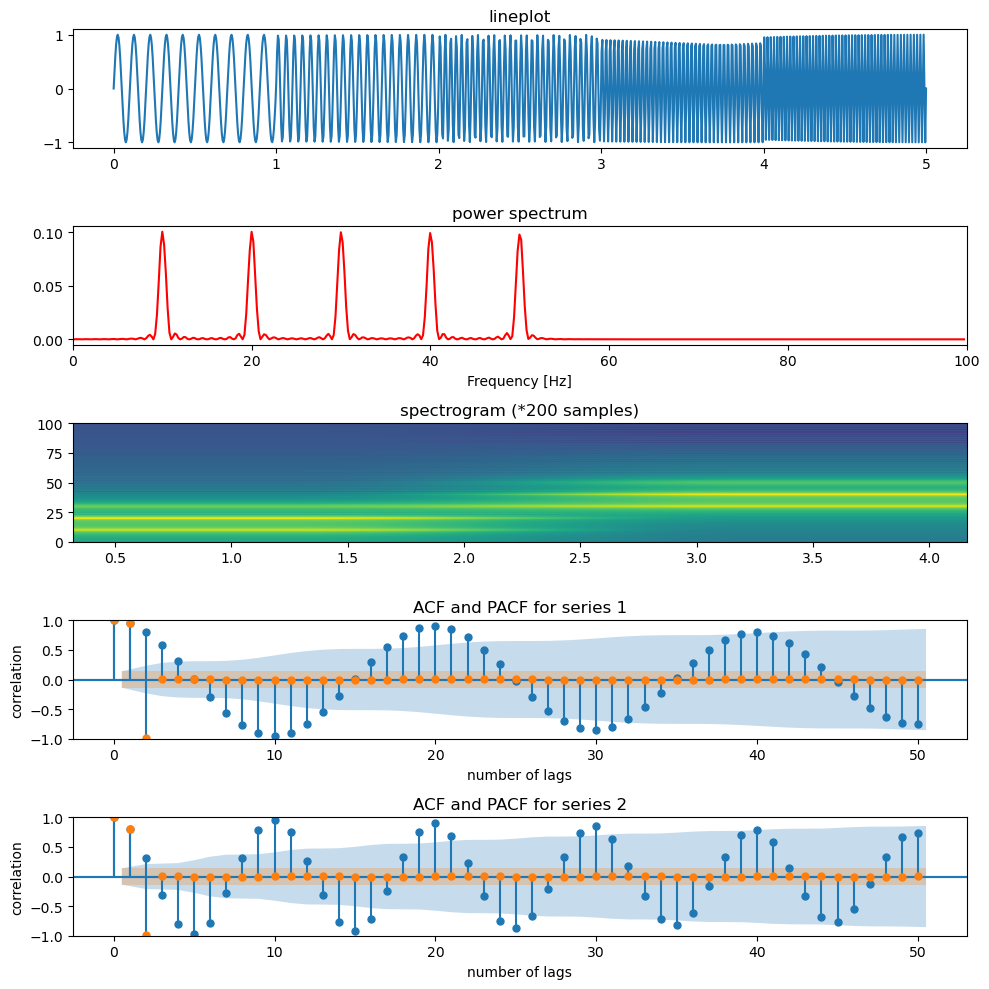

In [37]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.fftpack import fft, fftshift, ifft
import sklearn
import math
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

x = np.linspace(0, 5, 1000)
interval0 = [1 if (i<1) else 0 for i in x]
interval1 = [1 if (i>=1 and i<2) else 0 for i in x]
interval2 = [1 if (i>=2 and i<3) else 0 for i in x]
interval3 = [1 if (i>=3 and i<4) else 0 for i in x]
interval4 = [1 if (i>=4 and i<5) else 0 for i in x]

# 1. line plot
y = np.sin(20*math.pi*1*x)*interval0 + np.sin(20*math.pi*2*x)*interval1 + np.sin(20*math.pi*3*x)*interval2 + np.sin(20*math.pi*4*x)*interval3 + np.sin(20*math.pi*5*x)*interval4

plt.figure(figsize = (10, 10))
ax = plt.subplot(511)
ax.set_title('lineplot')
plt.tight_layout()
plt.plot(x, y)

# 2. power spectrum
ax = plt.subplot(512)
dt = x[1] - x[0]
N = 1000
T = N * dt
yf = fft(y - y.mean())
Syy = 2 * dt ** 2 / T * (yf * np.conj(yf)) # Compute spectrum
Syy = Syy[:int(len(y) / 2)]             # Ignore negative frequencies
df = 1 / T.max()                       # Determine frequency resolution
fNQ = 1 / dt / 2                        # Determine Nyquist frequency
faxis = np.arange(0,fNQ,df)                # Construct frequency axis
plt.plot(faxis, np.real(Syy), color = 'red')                  # Plot spectrum vs frequency
plt.xlim([0, 100])                          # Select frequency range
plt.xlabel('Frequency [Hz]')
ax.set_title('power spectrum')
plt.tight_layout()

# 3. spectrogram
ax = plt.subplot(513)
ax.set_title('spectrogram (*200 samples)')
plt.tight_layout()
plt.specgram(y, NFFT=512, Fs=200)

# 4. ACF & PACF of series 1, where ACF is blue and PACF is orange
x1 = np.linspace(0, 1, 200)
x2 = np.linspace(1, 2, 200)
y1 = np.sin(20*math.pi*1*x1)
y2 = np.sin(20*math.pi*2*x2)
ax = plt.subplot(514)
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()
plot_acf(y1, ax, 50)
plot_pacf(y1, ax, 50, title = 'ACF and PACF for series 1')

# 5. ACF & PACF of series 2, where ACF is blue and PACF is orange
ax = plt.subplot(515)
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()
plot_acf(y2, ax, 50)
plot_pacf(y2, ax, 50, title = 'ACF and PACF for series 2')
plt.show()




# Task 2.2  Statistical features and discovery of event-related potential

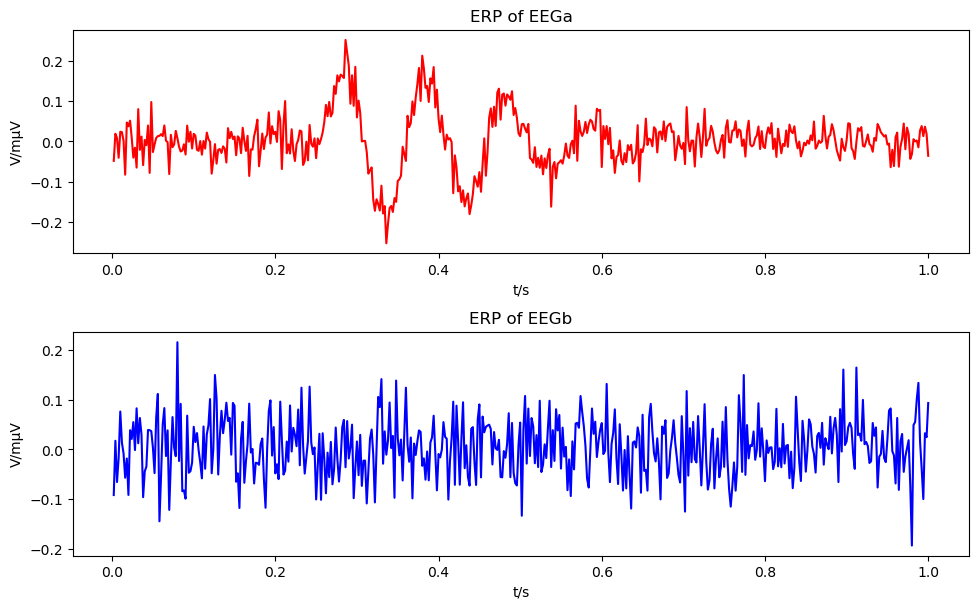

In [7]:
from scipy.io import loadmat
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# load data
data = loadmat('dataset/02_EEG-1.mat')
data.keys()
EEGa = data['EEGa']
EEGb = data['EEGb']
t = data['t'][0]

# ERG of EEGa
plt.figure(figsize = (10, 6))
mna = EEGa.mean(0)
ax = plt.subplot(211)
ax.set_title('ERP of EEGa')
plt.xlabel('t/s')
plt.ylabel('V/mμV')
plt.tight_layout()
plt.plot(t, mna, color = 'red')

# ERP of EEGb
mnb = EEGb.mean(0)
ax = plt.subplot(212)
ax.set_title('ERP of EEGb')
plt.tight_layout()
plt.xlabel('t/s')
plt.ylabel('V/mμV')
plt.plot(t, mnb, color = 'blue')
plt.show()

#  Task 2.3 Features of observed rhythms in EEG

2.731148640577885e-17
0.5047172407856452
0.7104345436320261


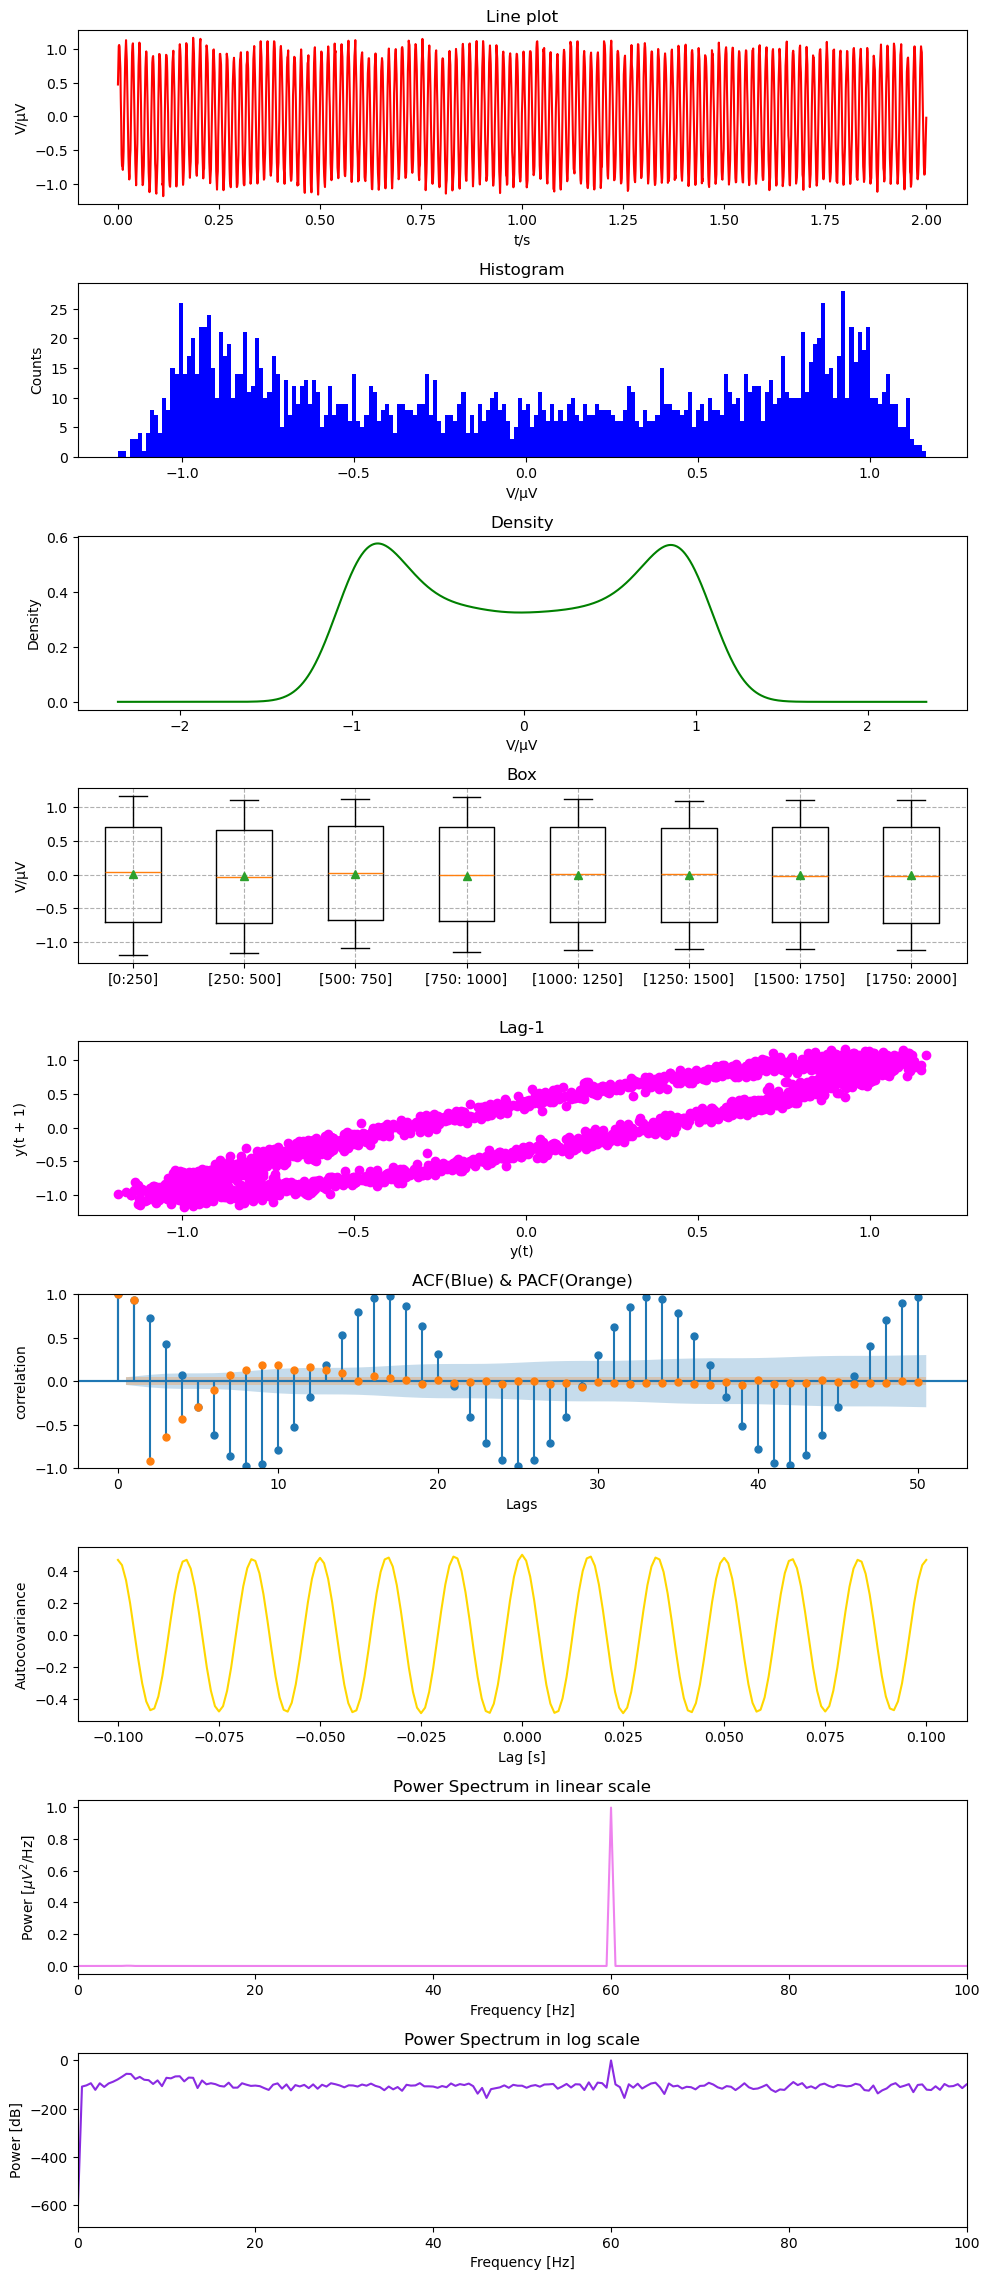

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.io import loadmat
from scipy.fftpack import fft

# load data 
data = loadmat('dataset/03_EEG-1.mat')
data.keys()
EEG = data['EEG'].reshape(-1)
t = data['t'][0]

# line plot
plt.figure(figsize = (10, 25))
ax = plt.subplot(10,1,1)
ax.set_title('Line plot')
plt.xlabel('t/s')
plt.ylabel('V/μV')
plt.tight_layout()
plt.plot(t, EEG, color = 'red')

# histogram
ax = plt.subplot(10,1,2)
ax.set_title('Histogram')
plt.xlabel('V/μV')
plt.ylabel('Counts')
plt.tight_layout()
plt.hist(EEG, bins = 200, color = 'blue')

# density
EEG_D = pd.Series(EEG)
ax = plt.subplot(10,1,3)
ax.set_title('Density')
plt.xlabel('V/μV')
plt.ylabel('Density')
plt.tight_layout()
EEG_D.plot(kind = 'kde', color = 'green')

# box plot
ax = plt.subplot(10,1,4)
EEG_1 = EEG_D[0: 250]
EEG_2 = EEG_D[250: 500]
EEG_3 = EEG_D[500: 750]
EEG_4 = EEG_D[750: 1000]
EEG_5 = EEG_D[1000: 1250]
EEG_6 = EEG_D[1250: 1500]
EEG_7 = EEG_D[1500: 1750]
EEG_8 = EEG_D[1750: 2000]
EEG_0 = [EEG_1, EEG_2, EEG_3, EEG_4, EEG_5, EEG_6, EEG_7, EEG_8]
ax.set_title('Box')
ax.boxplot(EEG_0, showmeans = True)
plt.setp(ax, xticks=[1,2,3,4,5,6,7,8], xticklabels=['[0:250]', '[250: 500]', '[500: 750]','[750: 1000]', '[1000: 1250]', '[1250: 1500]'
                                                    ,'[1500: 1750]', '[1750: 2000]'])
plt.ylabel('V/μV')
plt.grid(linestyle='--')
plt.tight_layout()

# lag-1 plot
ax = plt.subplot(10,1,5)
ax.set_title('Lag-1')
pd.plotting.lag_plot(EEG_D, c = 'magenta')
plt.tight_layout()

# ACF & PACF 
ax = plt.subplot(10,1,6)
plot_acf(EEG, ax, 50)
plot_pacf(EEG, ax, 50, title='ACF(Blue) & PACF(Orange)')
plt.tight_layout()
plt.xlabel('Lags')
plt.ylabel('correlation')

# derive statistic characters
print(EEG.mean())
print(EEG.var())
print(EEG.std())

# auto-covariance 
lags = np.arange(-len(EEG) + 1, len(EEG))    
ac = 1 / 2000 * np.correlate(EEG - EEG.mean(), EEG - EEG.mean(), mode='full')
inds = abs(lags) <= 100    
ax = plt.subplot(10,1,7)
plt.plot(lags[inds] * (t[1] - t[0]), ac[inds], color = 'gold')       
plt.xlabel('Lag [s]')                    
plt.ylabel('Autocovariance')

# power spectrum in linear scale 
ax = plt.subplot(10,1,8)
ax.set_title('Power Spectrum in linear scale')
dt = t[1] - t[0]                      # Define the sampling interval
N = EEG.shape[0]                        # Define the total number of data points
T = N * dt  
xf = fft(EEG - EEG.mean())                  # Compute Fourier transform of x
Sxx = 2 * dt ** 2 / T * (xf * np.conj(xf)) # Compute spectrum
Sxx = Sxx[:int(len(EEG) / 2)]             # Ignore negative frequencies
df = 1 / T.max()                       # Determine frequency resolution
fNQ = 1 / dt / 2                        # Determine Nyquist frequency
faxis = np.arange(0,fNQ,df)                # Construct frequency axis
plt.plot(faxis, np.real(Sxx), color = 'violet')                  # Plot spectrum vs frequency
plt.xlim([0, 100])                          # Select frequency range
plt.xlabel('Frequency [Hz]')                # Label the axes
plt.ylabel('Power [$\mu V^2$/Hz]')
plt.tight_layout()

# power spectrum in log scale
ax = plt.subplot(10,1,9)
ax.set_title('Power Spectrum in log scale')
plt.xlim([0, 100])  
plt.xlabel('Frequency [Hz]')                # Label the axes
plt.ylabel('Power [dB]')
plt.plot(faxis, 20*np.log10(np.real(Sxx)), color = 'blueviolet') 
plt.tight_layout()
plt.show()





# Validate calculations

[ 0.71140741  0.98725926  0.89422222  0.49896296 -0.13185185 -0.93155556
 -1.83348148 -2.77096296 -2.80622222 -2.13925926 -0.97007407  0.50133333
  2.07496296  3.55081481  4.72888889  3.55081481  2.07496296  0.50133333
 -0.97007407 -2.13925926 -2.80622222 -2.77096296 -1.83348148 -0.93155556
 -0.13185185  0.49896296  0.89422222  0.98725926  0.71140741]


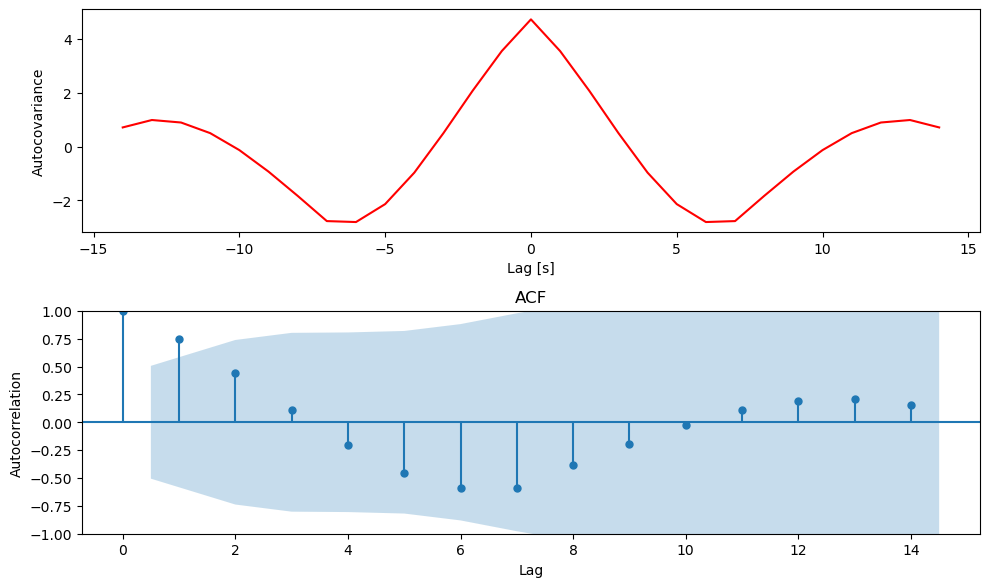

[ 1.          0.75087719  0.43878446  0.10601504 -0.20513784 -0.45238095
 -0.59342105 -0.58596491 -0.3877193  -0.19699248 -0.02788221  0.10551378
  0.18909774  0.20877193  0.1504386 ]


In [31]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

# given time series
x = [1, 2, 3, 4, 5, 6, 7, 8, 7, 6, 5, 4, 3, 2, 1]
t = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

# validate auto-covariance
plt.figure(figsize = (10, 6))
lags = np.arange(-len(x) + 1, len(x))    
ac = 1 / 15 * np.correlate(x - np.mean(x), x - np.mean(x), mode='full')
inds = abs(lags) <= 100
ax = plt.subplot(2,1,1)
plt.plot(lags * (t[1] - t[0]), ac, color = 'red')       
plt.xlabel('Lag [s]')                    
plt.ylabel('Autocovariance')
plt.tight_layout()

print(ac)

# validate auto-correlation
ax = plt.subplot(2,1,2)
plot_acf(x, ax, 14, title='ACF')
plt.xlabel('Lag')                    
plt.ylabel('Autocorrelation')
plt.tight_layout()
plt.show()

print(acf(x, nlags = 14))
